----
# Chapter 2 - Discovering patterns in Data


Aim:
Identify factors determining high-pressure game situtations and factors affecting scoring probability

----
## 2.1 - Quantifying associations between variables

----
Association or term dependence: any statistical relationship between two variables, casual or otherwise

Types of variables:
1. Categorical variables
2. Numerical variables

__Categorical variables__ assign each unit of observation to a particular group or category on the basis of some qualitative property; possible values for categorical variables can be attributes or categories
Eg: 
- Conference to which a team belongs - East or West
- Result of a shot - made or missed
- Player's role - with 5 possibles values given by point guard, shooting gaurd, small forward, power forward and center


__Discrete numerical variable__ , for example, is the total number of points made, while the time played in the quarter is a __continuous numerical variable__

__*Why is the distinction important?*__

Because statistical methods conceived for variables of one kind cannot be appropriatly used to analyze the other kind of variables

Focusing on **bivariate analysis**, there 3 common definitions:
1. Statistical dependence
2. Mean dependence
3. Correlation

__Statistical dependence__ can be evaluated when variables are both categorical or at least one is numerical, or they are both numerical.

__Mean dependence__ requires at least one numerical variable

__Correlation analysis__ requires that both variables are numerical


_This book is devoted to the study of correlation, because the in basketball analytics the variables of interest are often numerical_

____

### 2.1.1 - Statistical dependence

Statistical dependence can be studied using a two-way cross-table and investigating the general relationship between the two variables.
This method compares the observed frequencies with the number of expected frequencies under the independence hypothesis.

Many association indexes proposed in literature are based on summary of differences  between the observed and the exercised frequency - statistical difference (beyond random chance)

Most famous assocaition index based on the differences between observed and expected frequencies is teh Chi-square (${X^2}$, sometimes indicated as $\chi^2$).

Suppose table of *r* rows x *c* columns and let $n_{ij}$ and $\hat{n}_{ij}$ (*i* = 1,..., *r* ; *j* = 1,...,*c*) be the observed and expected frequency respectively in a random cell *i,j*. $X^2$ can be computed as $\sum_{i} \sum_{j} \frac {(n_{ij} - \hat{n}_{ij})^2} {\hat{n}_{ij}}$.

Since the above mesaures the intensity of the relationship between the two variables, but also depends on the sample size $N$, number of $r$ rows and $c$ columns, this statistic has been adjusted in several ways, giving birth to a number of related measures of association, like:
1. Phi $\phi$ ( $\phi = \sqrt{{X^2}/{N}}$, also known as $M_{2}(D)$)
2. Mean Squared Contingency (${\phi^2}$)
3. Pearson's contingency coefficient $P$ ($P = \sqrt{ \phi^2 / (\phi^2 + 1)}$)
4. Cramers's *V*, also known as the normalized index $C$ ($ V = \phi / \sqrt{k - 1}$) where $k = min(r, c)$)

NOTE: When there is no association between the two variables, each of these above measures have a value of 0

As the intensity of association increases, the value of each of these measures increases. **Cramer's $V$ is the preferred measure** because it is the only one that equals 1 in the case of a perfect association between the two variables and so can be easily interpreted as a percentage.
In addition, since Cramer's $V$ formula considers the dimensions of the table, it can be used for comparisons among tables of different dimensions (size of the tables doesn't have to be the same).

A significance test is usually performed on {X^2} (called *Chi-square test of independence*, based on the $\chi^2$ distribution) in order to test whether the $X^2$ value can be considered statistically different from zero, indicating that there exists a significant association between the two variables. For the other association measures derived from $X^2$, it can be said that their tests of significance lead to the same conclusion as it is for the $\chi^2$ test of independence.

For example, we may be interested in analyzing if some game statistics of the Golden State Warriors depends on the opponent team they play. To do this, we can compute some  association measure between the two variables crossed in table `T` below, which reports the #of free throws, missed shots, rebounds and attempted shots by Golden State Warriors in the matches played against each of the opponent teams shown in the table rows



In [5]:
library(BasketballAnalyzeR)

Warning message:
“package ‘BasketballAnalyzeR’ was built under R version 4.0.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



In [4]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.1                         
year           2020                        
month          06                          
day            06                          
svn rev        78648                       
language       R                           
version.string R version 4.0.1 (2020-06-06)
nickname       See Things Now              

In [5]:
RNGkind(sample.kind = "Rounding")

Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [6]:
data(package="BasketballAnalyzeR")

Package,Item,Title
<chr>,<chr>,<chr>
BasketballAnalyzeR,Obox,Opponents box scores dataset - NBA 2017-2018
BasketballAnalyzeR,PbP.BDB,Play-by-play dataset - NBA 2017-2018
BasketballAnalyzeR,Pbox,Players box scores dataset - NBA 2017-2018
BasketballAnalyzeR,Tadd,Tadd dataset - NBA 2017-2018
BasketballAnalyzeR,Tbox,Teams box scores dataset - NBA 2017-2018


In [7]:
PbP <- PbPmanipulation(PbP.BDB)

In [12]:
PbP.GSW <- subset(PbP, team=="GSW")

In [13]:
ev <- c("ejection", "end of period", "jump ball",
        "start of period", "unknown", "violation",
        "timeout", "sub", "foul", "turnover")

In [14]:
ev

[1] "ejection"        "end of period"   "jump ball"       "start of period"
 [5] "unknown"         "violation"       "timeout"         "sub"            
 [9] "foul"            "turnover"

In [15]:
event.unsel <- which(PbP.GSW$event_type %in% ev)

In [16]:
PbP.GSW.ev <- PbP.GSW[-event.unsel,]

In [17]:
PbP.GSW.ev

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,⋯,original_x,original_y,converted_x,converted_y,description,periodTime,totalTime,playlength,ShotType,oppTeam
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
481,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,9,254,25.9,63.6,MISS Green 25' 3PT Jump Shot,33,33,20,3P,HOU
484,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,NA,NA,NA,NA,Durant REBOUND (Off:0 Def:1),54,54,7,NA,HOU
486,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,NA,NA,NA,NA,Pachulia Free Throw 1 of 2 (1 PTS),55,55,0,FT,HOU
487,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,NA,NA,NA,NA,Pachulia Free Throw 2 of 2 (2 PTS),55,55,0,FT,HOU
489,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,157,200,40.7,69.0,MISS Durant 25' 3PT Jump Shot,73,73,16,3P,HOU
492,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,NA,NA,NA,NA,Pachulia REBOUND (Off:0 Def:1),87,87,6,NA,HOU
493,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,-228,16,2.2,87.4,Thompson 3PT Jump Shot (3 PTS) (Green 1 AST),90,90,3,3P,HOU
495,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,-142,163,10.8,72.7,Thompson 22' Jump Shot (5 PTS) (Green 2 AST),115,115,11,2P,HOU
497,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,⋯,NA,NA,NA,NA,Curry REBOUND (Off:0 Def:1),133,133,4,NA,HOU


The cross-table `T` is given by:

In [18]:
attach(PbP.GSW.ev)

In [19]:
T <- table(oppTeam, event_type, exclude=ev)

In [20]:
T

       event_type
oppTeam free throw miss rebound shot
    ATL         33   88      81   84
    BKN         34   80      98   93
    BOS         45   95      90   71
    CHA         26   91      90   80
    CHI         46   80      98   95
    CLE         47   88      95   79
    DAL         74  155     188  188
    DEN         78  172     164  173
    DET         34   75      85   83
    HOU         56  118     119  131
    IND         33   97      90   72
    LAC        127  161     166  176
    LAL        104  190     202  176
    MEM         77  126     128  117
    MIA         48   92      92   79
    MIL         33   70      74   85
    MIN         54  132     142  133
    NOP         85  183     175  180
    NYK         46   78      79   90
    OKC         86  176     179  153
    ORL         27   77      92   99
    PHI         46   76      88   98
    PHX         59  166     178  197
    POR         60  123     116  125
    SAC         76  165     169  159
    SAS         70  

In [27]:
detach(PbP.GSW.ev)

In [99]:
# detach(Tbox)

Some association measure can be directly obtained by resporting to the function assocstats in the library `vcd` as. follows:

In [69]:
# install.packages("vcd", repos='http://cran.us.r-project.org')

In [5]:
library(vcd)

Warning message:
“package ‘vcd’ was built under R version 4.0.2”
Loading required package: grid



In [6]:
assocstats(T)

ERROR: Error in apply(x, 3:l, FUN = assocstats): dim(X) must have a positive length


As the above results show:
- the association between the two variables is low (Cramer's $V$=~0.06), but significantly not 0. 
- Pearson's $\chi^2$ = 116.25 has *p*-value=~0.011. An association is usually considered significant when *p*-value is lower than conventional values 0.05 or 0.10. Ergo, not significant
- Liklihood ratio a.k.a *G*-test, that gives here the same indications as the Chi-square test of independence, not significant.

**We may conclude that there is low association that the number of game events (shots, missed shots, rebounds and free throws) in GSW's playtime depends on the opponent team**. Play attention to the fact that teams do not play against all other teams an equal number of times


____

### 2.1.2 - Mean dependence

Mean dependence allows us to examine **correlation**, e.g., if the average number of points scored by all the NBA teams differ between the East and West Conferences or among the different Divisions, or between qualified teams for Playoffs, or to study if the average number of fouls (or assists, rebounds, ...) of one team differs across the quarters.

In those situation, we want to analyze if and how the average of a numerical variable (e.g., the points made) varies acriss the classes defined by another variable (e.g., the points made) varies across the classes defined by another variable, which can be categorical (e.g., Playoff, with values Yes or No)

In EDA, a variable *Y* is said to be **mean independent** from another variable *X* if and only if the conditional means of *Y* (i.e, the means computed within each group or class defined by *X*) are all equal and, consequently, equal to the unconditional mean of *Y* (computed over all the observation units, with out considering their classification according to *X*).

----
Note on ***Mean Independence***:

Given two real random variables X and Y, we say that:

1. $X$ and $Y$ are independent if the events ${X≤x}$ and ${Y≤y}$ are independent for any x,y,
2. $X$ is **mean independent** from $Y$ if its conditional mean $𝔼(Y|X=x)$ equals its (unconditional) mean $𝔼(Y)$ for all $X$ such that the probability that $X=x$ is not zero,
3. $X$ and $Y$ are uncorrelated if $𝔼(XY)=𝔼(X)𝔼(Y)$.

Assuming the necessary integrability hypothesis, we have the implications  1.⟹2.⟹3..
The 2nd implication follows from the law of iterated expectations: 
$𝔼(XY)=𝔼(𝔼(XY|Y))=𝔼(𝔼(X|Y)Y)=𝔼(X)𝔼(Y)$
____

A well-known index able to measure the level of mean dependence of $Y$ with respect to $X$ is the **Pearson's correlation ratio $\eta^2_{Y/X}$**, that is the ratio of the between deviance over the total deviance $(BD/TD)$. (based on Total Deviance decomposition explained in the next notebook)

Pearson's correlation ratio $\eta^2_{Y/X}$ ranges from 0 (when the conditional means of *Y* are all equal and *Y* is mean independent from *X*) to 1 (*Y* perfectly depends on average of $X$). The ratio finds a very useful application in cluster analyis, where it helps deciding the number of clusters to maintain in the solution of a $k$-means clustering.

To investigate the mean dependence of some game variables on Playoff qualification, we compute the conditional means of each variable, that is averaging over teams qualified *(Playoff=Yes)* and not qualified *(Playoff=No)*, separately, adn the values of the Pearson's correlation ratio $\eta^2$, in %.

In [21]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
# install.packages("lsr", repos='http://cran.us.r-project.org')

In [22]:
library(lsr)

Warning message:
“package ‘lsr’ was built under R version 4.0.2”


In [20]:
# install.packages("tibble", repos='http://cran.us.r-project.org')

In [23]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.0.2”


In [24]:
FF <- fourfactors(Tbox, Obox)

In [47]:
attach(Tbox)

The following objects are masked from data:

    AST, BLK, DREB, FTA, FTM, FTp, GP, MIN, OREB, P2A, P2M, P2p, P3A,
    P3M, P3p, PF, PM, PTS, STL, Team, TOV


The following object is masked from FF:

    Team




In [48]:
attach(FF)

The following object is masked from Tbox:

    Team


The following object is masked from data:

    Team


The following objects are masked from FF (pos = 5):

    DRtg, F1.Def, F1.Off, F2.Def, F2.Off, F3.Def, F3.Off, F4.Def,
    F4.Off, ORtg, PACE.Def, PACE.Off, POSS.Def, POSS.Off, Team




In [30]:
X <- data.frame(PTS, P2M, P3M, FTM, REB=OREB+DREB, AST,
                STL, BLK, ORtg, DRtg)

In [31]:
detach(Tbox)

In [32]:
detach(FF)

In [33]:
Playoff <- Tadd$Playoff

In [34]:
eta <- sapply(X, function(Y){
    cm <- round(tapply(Y, Playoff, mean), 1)
    eta2 <- etaSquared(aov(Y~Playoff))[1]*100
    c(cm, round(eta2, 2))
}) %>%
    t() %>%
    as.data.frame() %>%
    rename(No=N, Yes=Y, eta2=V3) %>%
    tibble::rownames_to_column("rowname") %>%
    arrange(-eta2) %>%
    tibble::column_to_rownames('rowname')

eta

,No,Yes,eta2
,<dbl>,<dbl>,<dbl>
DRtg,107.9,104.6,42.53
ORtg,104.0,108.1,40.25
STL,601.9,659.6,28.77
PTS,8576.0,8844.8,19.28
BLK,365.6,420.4,18.12
FTM,1328.0,1394.4,5.58
P2M,2353.7,2417.2,3.28
AST,1875.5,1931.6,3.17
P3M,846.9,871.9,1.07


^ Game variables' averages (conditional to Playoff) and values of $\eta^2$ of mean dependence of game variables on Playoff qualification

All the conditional means differ between qualified and non-qualified teams. Ergo, we can conclude that all these game variables are, to some extent, dependent on the Playoff qualification.

As seen the table above, the values of $\eta^2$, in several cases the degree of mean dependence is very low. 
For example, the number if rebounds and assists or the number of shots made (2-pt, 3pt and free throws) are substantially not dependent on thh Playoff qualification (they all have $\eta^2$ lower that 6%).

On the contrary, Defensive and Offensive Ratings are (moderately) highly dependent on Playoff ($\eta^2 = $42.35% and 40.25%, respectively)

This shows that it is the game as a whole that counts, not the game variables taken 
individually. Single variables don't tell us the whole story.

____
### 2.1.3 - Correlation

Correlation is a specific kind of statistical association which refers to the **linear relationship between two numerical variables**. When numerical variables are available, measuring the degree of association by using statistical dependence or mean dependence methods degrades both variables (in the case of statistical dependence) or one of them (in case of mean dependence) to fill the role of categorical variables.

Instead, correlation analysis allows the optimal use of the information available in the **numerical variables which prevail over categoraical ones**

In much detail, correlation analysis is based on concordance indices that are **positive** when the highest values of one variable are associated with the highest values of other variable and negative in the opposite case, and **negative** when the highest values of one variable are associated with the lowest values of the other variable

The most widespread concordance index is **Pearson's correlation coefficient** which is designed to measure both intensity and direction of a linear relationship between the two variables. The focus is then on a linear relationship between the two variables and we can think of an interdependence between variables. Other concordance indexes measuring nonlinear association between variables have been proposed, for example the well known Kendall's $\tau$

Given two variables $X$ and $Y$, the value of Pearson's correlation coefficient $\rho$ between $X$ and $Y$ ranges from $-1$ to $1$, with the extremes meaning perfect (negative or positive respectively) correlation and values near to 0 denoting absence of linear corelation (not necessarily absence of any kind of association)

![Pearson correlation coeffecient](../static/2.1.3.correlation-coefficient.png)

The following code computes the calue of $\rho$ between the number of assists (AST) and turnovers (TOV) per minute played for players who have played at least 500 minutes

In [8]:
data <- subset(Pbox, MIN>=500)

In [9]:
attach(data)

In [10]:
X <- data.frame(AST, TOV)/MIN

In [52]:
detach(data)

In [11]:
cor(X$AST, X$TOV)

[1] 0.6873883

^ The Pearson correlation coefficient equals $0.687$: as expected, there exists a positive linear relationship between assists and turnovers and the intensity of the association is rather strong

In [12]:
cor(rank(X$AST), rank(X$TOV))

[1] 0.6679628

^ Pearson correlation between ranking based on assists and turnovers -- equivalent to computing Spearman's correlation coefficient

**Spearman's correlation coeffecient**/ is one of the most common rank-correlation measures and ranges from $-1$ to $1$: it equals **1** when the player's postions are identical in the two rankings (perfect rank-agreement) and **-1** when once ranking is the reverse of the other (perfect disagreement). Values close to **0** suggest no association between rankings and increasing values imply increasing agreement between rankings

In [13]:
cor(X$AST, X$TOV, method="spearman")

[1] 0.6679628

^ value of $0.668$ denotes a positive and strong assocation between the two rankings: players on top positions in the ranking of assists tend to rank high on turnovers

**If we have more than two variables, we can compute all the Pearson correlation coeffecients between each pair of variables and collect them in a matrix, called *correlation matrix***. It is a squared matrix (number of rows equal to the number of columns) with dimension given by the number of analyzed variables.

In [14]:
cor(X) # correlation matrix of a variable with itself

,AST,TOV
AST,1.0000000,0.6873883
TOV,0.6873883,1.0000000


If __X__ contains more than two variables, __cor__ returns a correlation matrix of higher dimensions. 

---
## 2.2 - Analyzing pairwise linear correlation among variables
---

The term __"pairwise"__ indicates that even if more than two variables are jointly analysed with these two functions (corranalysis and scatterplot), leading to the creation of a correlation matrix and its related plot.
The liner correlation coefficient remains a measure of bivaraite association, as it evaluates direction and intensity of the linear relationship between all the possible pairs of variables

After merging Pbox and Tadd data in order to complete the players' boxscores data with some additional variables regarding the teams (conferences, division, qualification for Playoffs, ...), we select those players who played at least 500 minutes.

In [15]:
data <- merge(Pbox, Tadd, by="Team")
data <- subset(data, MIN>=500)

In [16]:
attach(data)

The following objects are masked from data (pos = 3):

    AST, BLK, DREB, FTA, FTM, FTp, GP, MIN, OREB, P2A, P2M, P2p, P3A,
    P3M, P3p, PF, Player, PM, PTS, STL, Team, TOV




We consider the following variables for per minute played:
- points scored
- 3pt and 2pt shots made
- total rebounds (offensive and defensive)
- assists
- turnovers
- steals
- blocks

In [17]:
X <- data.frame(PTS, P3M, P2M, REB=(OREB+DREB), AST,
                TOV, STL, BLK)/MIN

In [18]:
X <- data.frame(X, Playoff=Playoff)

In [19]:
detach(data)

We first compute pairwise linear correaltion between the numerical variables and plot a graphical representaion of the correlation matrix

In [20]:
corrmatrix <- corranalysis(X[,1:8], threshold=0.5)

In [21]:
corrmatrix

,PTS,P3M,P2M,REB,AST,TOV,STL,BLK
PTS,1.00000000,0.35714729,0.675226216,0.1152072,0.27815745,0.52419694,-0.010137850,0.01677160
P3M,0.35714729,1.00000000,-0.422004625,-0.5177453,0.07690833,-0.06400823,-0.045410272,-0.46894832
P2M,0.67522622,-0.42200463,1.000000000,0.5063686,0.18337346,0.51547371,-0.001644765,0.37052416
REB,0.11520718,-0.51774533,0.506368557,1.0000000,-0.23645477,0.15631131,-0.158109239,0.63973900
AST,0.27815745,0.07690833,0.183373463,-0.2364548,1.00000000,0.68738828,0.342641011,-0.25076003
TOV,0.52419694,-0.06400823,0.515473707,0.1563113,0.68738828,1.00000000,0.228126040,0.07485739
STL,-0.01013785,-0.04541027,-0.001644765,-0.1581092,0.34264101,0.22812604,1.000000000,-0.02975639
BLK,0.01677160,-0.46894832,0.370524163,0.6397390,-0.25076003,0.07485739,-0.029756385,1.00000000
,PTS,P3M,P2M,REB,AST,TOV,STL,BLK
PTS,0.0000000,0.0000000,0.6752262,0.0000000,0.0000000,0.5241969,0,0.000000


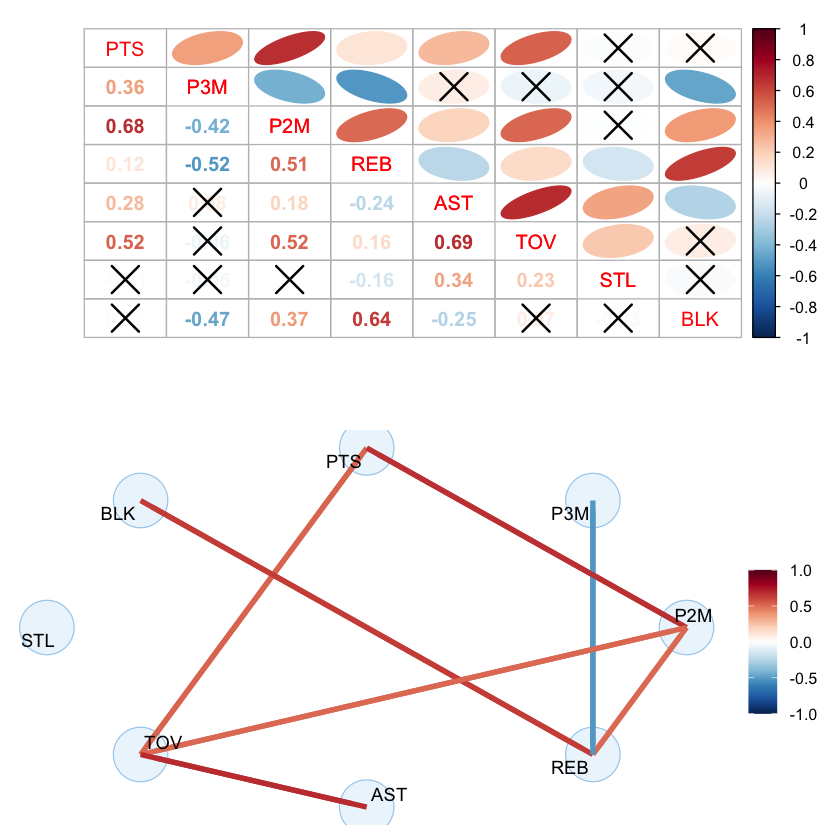

In [22]:
plot(corrmatrix, main="Linear correlation matrix plot", horizontal=FALSE)

The top panel of the image above gives a graphical description of the correlation matrix, a square grid whose ___i,j___ entry in the Pearson coorelation coefficient between the ___i-th___ and the ___j-th___ varaible of the list, $\rho_{ij}$.

In the lower traingle of the matrix, we see the Pearson coeff values, whereas the upper triangle uses stylized ellipses to give a rough idea of the shape of the relationship corresponding to each coeff. Blue denotes -ve correlation (cold) whereas red denotes +ve correlation (red).

The function `corranalysis` automatically performs a statistical test on the null hypothesis $\rho_{ij} = 0$, at the significance level $1 - \alpha = 95%$, and all the coefficients that turn out to be not significantly different from zero are marked with a cross on the grid. In other words, a cross means that the correlation coefficient between the two corresponding variables can __not__ be considered statistically different from zero.

The bottom panel, in the image above, shows the correlation network where the pairs of variables whose Pearson's correlation coefficient is significant are joined by a blue (-ve) or red (+ve) edge with color intensity poportional to the absolute value of the correlation coefficient.

We detect, as expected, a positive correlaton between blocks and rebounds, and negative correlation between 3pt shots made and rebounds. Another well-known evidence is the positive correlation between assists and turnovers. More subtle remarks concern the positive correlation between turnovers and scored points, and the low correlation between 3pt shots made and scored points, which turn out to be more correlated with 2pts shots made.

```
According to these evidences, we may conjecture that players able to move the ball (even if it entails the side effect of higher number of turnovers) and to shoot from within the 3pt line have been very effective in terms of scored points in the 2017/2018 NBA championship
```

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



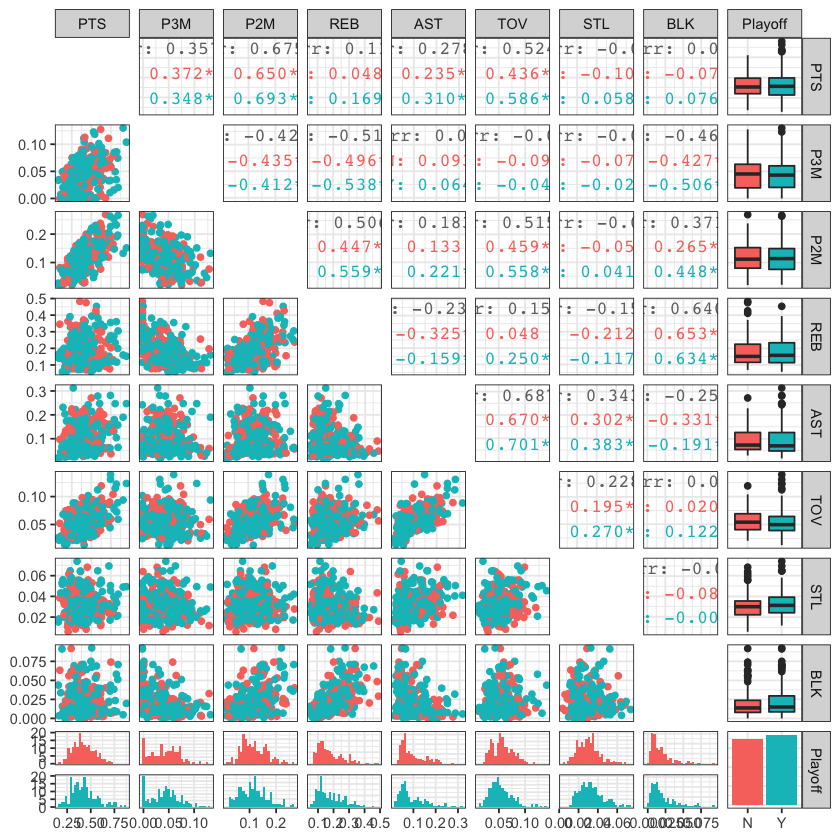

In [23]:
scatterplot(X, data.var=1:8, z.var="Playoff",
            diag=list(continuous="blankDiag"))

Using the scatterplot, it is interesting to note that when pairs of variables have positive correlatio, this is almost always higher for players in teams that qualified for Playoffs and the opposite happens for negative correlations.

The last two rows (histograms) and the last column (boxplot) display univariate analyses of the game variables. Through these univariate analyses, we do not detect relevant differences in game variables between the two groups.

---

## 2.3 - Visualizing similarities among individuals


___

There exist several methods of multivariate data analysis that allow to visualize similarities among individuals, for example (multiple) Correspondance Analysis, Prinicipal Components Analysis, optimal scaling methods.

Here we focus on Multidimensional Scaling (MDS), which is a nonlinear dimensionality reduction tool that allows to plot a map visualizing the level of similarity of individual cases of a dataset.

The starting point is a dissimilarity matrix:$\Delta = (\delta_{i,j=1,...N})$, where $\delta_{i,j}$ represents the dissimilarity between cases $i,j$.

Dissimilarity are distance-like quantities that can be obtained in several ways. When a distance metric is used, $\Delta$ is a distance matrix and is usually denoted by $D^p = (d_{i,j=1,...N})$ in order to distinguish it from thr more general case. The superscript $p$ indicates that distances are computed based on a set of $p$ selected variables $X_1,....X_p$

And $d_{i,j}$ is the Euclidean distance:

$d_{i,j} = \sqrt{\sum^p_{h=1}(x_{ih} - x_{jh})^2}$ 

with $x_{i,h}$ and $x_{j,h}$ denoting the value assumed by variable $X_h$ for cases $i$ and $j$, respectively.


The MDS algorithm aims to display each case in a $q$-dimensional space ($q << p$) such that the distance matrix $D^q$ of the obtained configuration fits as closely as possible the dissimilarity matrix $\Delta$ or the distance matrix $D^p$

The `R` function `MDSmap` optimizes the case locations for a 2-D scatter plot $(q = 2)$ and is based on Kruskal's nonmetric approach, requiring to minimize the so-called stress index $S$, a measure of how good is the match between the matrix $D^q$ of the resulting configuration and the input matrix $\Delta$ or $D^p$.

$S$ is a normalized index, so it can be expressed as a percentage. The stress index should be very close to 0, but it should not exceed $20\%$. MDS solutions are invariant to reflections and rotations, which allows for easier interpretation.

We now see an example of displaying players according to the similarity in their achievements in the following set of 8 variables: pts scored, 3pts and 2pts made, total rebounds (offensive and defensive), assists, turnovers, steals and blocks, limiting attention to those players who have played at least 1500 minutes in the championship

In [96]:
attach(Pbox)

The following objects are masked from data (pos = 3):

    AST, BLK, DREB, FTA, FTM, FTp, GP, MIN, OREB, P2A, P2M, P2p, P3A,
    P3M, P3p, PF, Player, PM, PTS, STL, Team, TOV


The following objects are masked from data (pos = 4):

    AST, BLK, DREB, FTA, FTM, FTp, GP, MIN, OREB, P2A, P2M, P2p, P3A,
    P3M, P3p, PF, Player, PM, PTS, STL, Team, TOV


The following objects are masked from data (pos = 5):

    AST, BLK, DREB, FTA, FTM, FTp, GP, MIN, OREB, P2A, P2M, P2p, P3A,
    P3M, P3p, PF, Player, PM, PTS, STL, Team, TOV




In [98]:
data <- data.frame(PTS, P3M, P2M, REB=(OREB+DREB),
                   AST, TOV, STL, BLK)

In [99]:
detach(Pbox)

In [100]:
data <- subset(data, Pbox$MIN>=1500)

In [101]:
id <- Pbox$Player[Pbox$MIN>=1500]

And to obtain the 2-D configuration:

In [102]:
mds <- MDSmap(data)

initial  value 15.910514 
iter   5 value 13.124944
final  value 12.967089 
converged


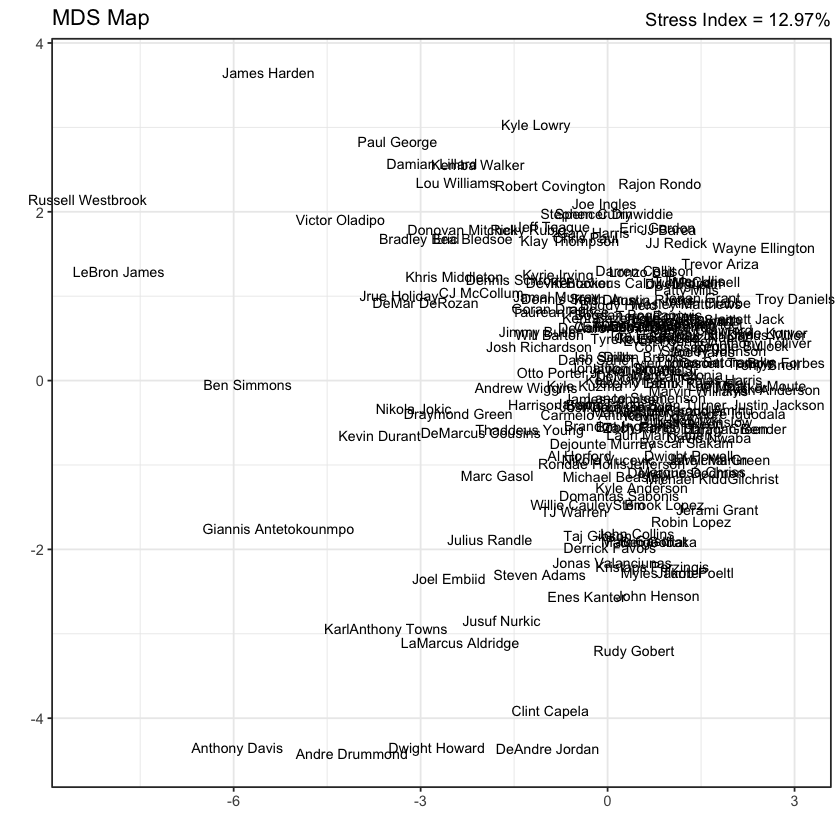

In [103]:
plot(mds, labels=id)

The players are displayed according to their similarity in the selected variables: players in close vicinity have similar achievements, while higher distance means more peculiar characteristics.

The goodness of the fit is fair $(S = 12.97\%)$

We can highlight some selected players or zoom into specific areas of the map

In [104]:
selp <- which(id=='Al Horford' | id=='Kyle Korver' |
              id=='Myles Turner' | id=='Kyle Kuzma' |
              id=='Andrew Wiggins')

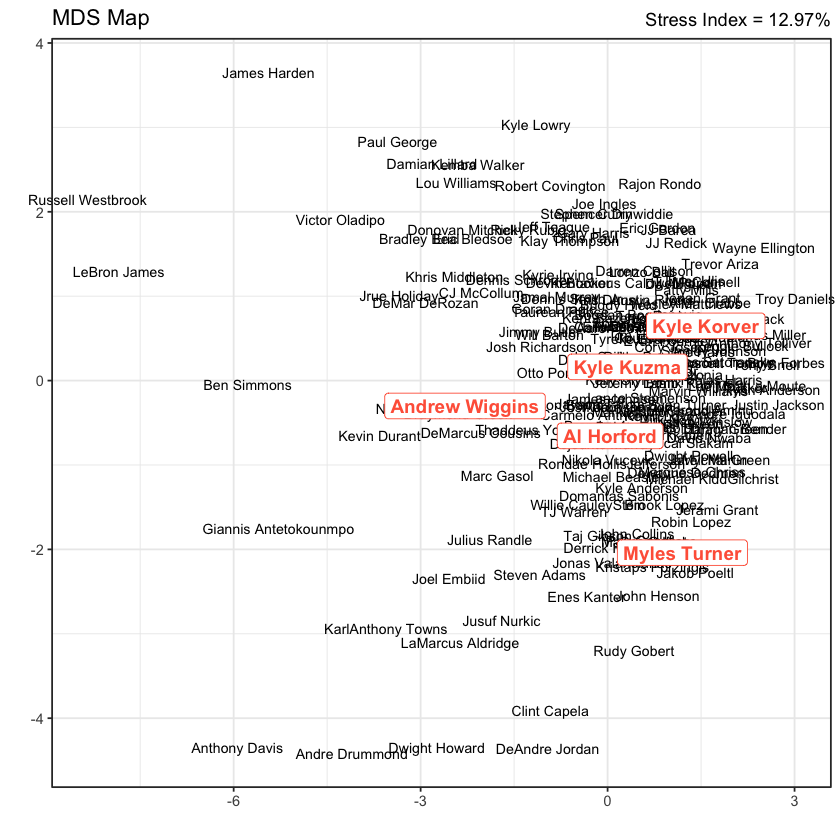

In [106]:
plot(mds, labels=id, subset=selp, col.subset='tomato')

Warning message:
“Removed 120 rows containing missing values (geom_text).”
Warning message:
“Removed 4 rows containing missing values (geom_label_repel).”


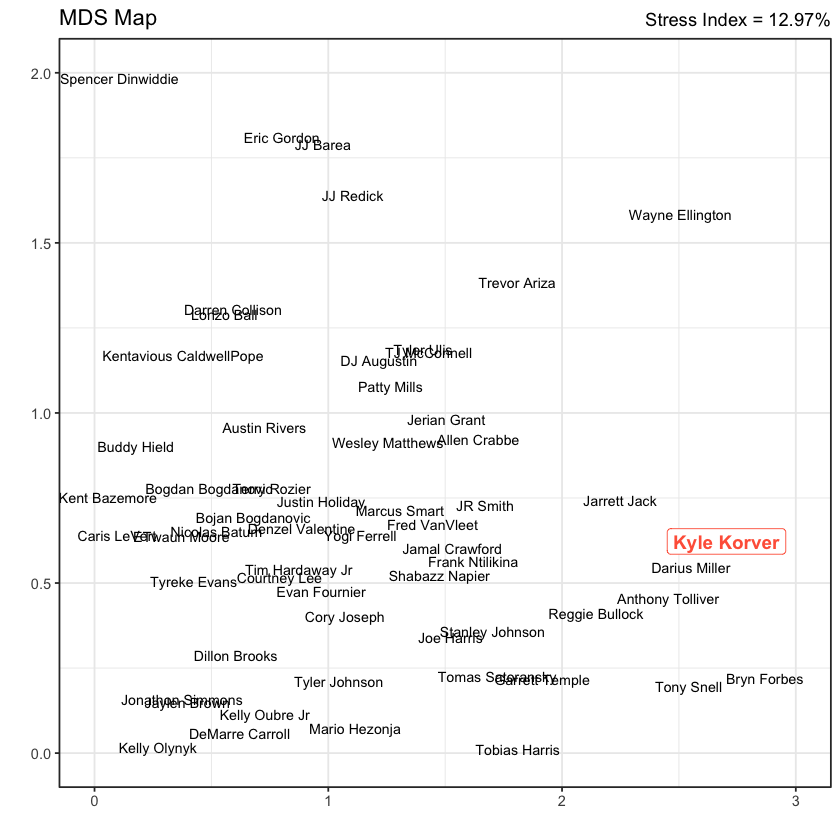

In [107]:
plot(mds, labels=id, subset=selp, col.subset='tomato',
     zoom=c(0,3,0,2))

Finally, in order to interpret the positioning of players or groups of players in the map with reference to some selected variables (eg: P2m, P3M, AST or REB), we may resort to color-coding the points in the map or alternatively overlap to the map a colored 'level plot'.

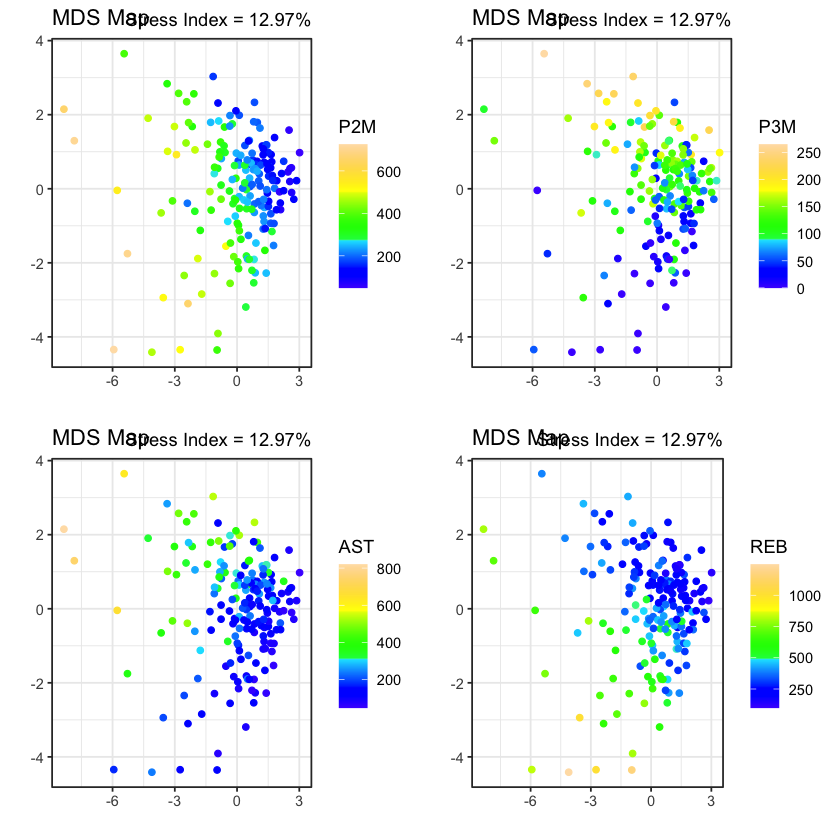

In [108]:
plot(mds, z.var=c("P2M", "P3M", "AST", "REB"),
     level.plot=FALSE, palette=topo.colors)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

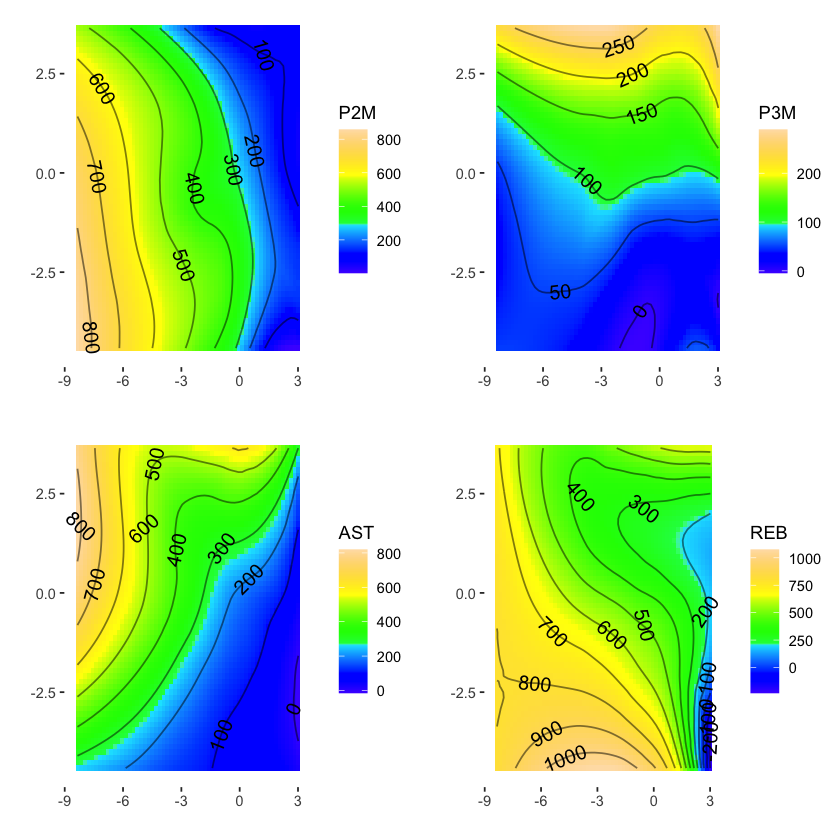

In [112]:
plot(mds, z.var=c("P2M", "P3M", "AST", "REB"),
     level.plot=TRUE, contour=TRUE, palette=topo.colors)

The joint evaluation of all the graphs helps to determine the meaning if the players' positioning. For example, 2-3pt shots made tend to increase when moving from right to left and from bottom to top areas, respectively, so players positioned in the top-left quadrant of the map are quite good on both the achievements. The top-left quadrant is also characterized by a high number of assists. The bottom-left quadrant, instead, is marked by high levels of 2pt shots made and rebounds, but very low levels of 3pts. Finally, the right-bottom quadrant denites low perfromance in all four game variables.

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collaps

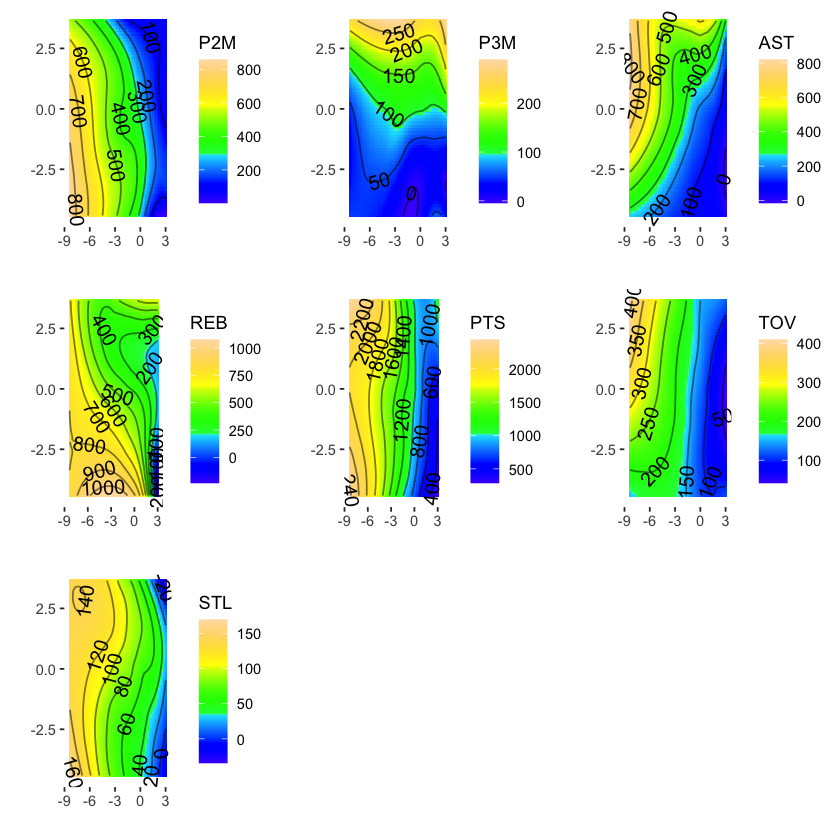

In [119]:
plot(mds, z.var=c("P2M", "P3M", "AST", "REB", "PTS", "TOV", "STL"),
     level.plot=TRUE, contour=TRUE, palette=topo.colors)

---

## 2.4 - Analyzing Network Relationships


___

Since basketball is a team sport, an important issue is to analyze interactions between players duting the game using play-by-play or tracking data

In [1]:
library(BasketballAnalyzeR)

Warning message:
“package ‘BasketballAnalyzeR’ was built under R version 4.0.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



In [2]:
data(package="BasketballAnalyzeR")

Package,Item,Title
<chr>,<chr>,<chr>
BasketballAnalyzeR,Obox,Opponents box scores dataset - NBA 2017-2018
BasketballAnalyzeR,PbP.BDB,Play-by-play dataset - NBA 2017-2018
BasketballAnalyzeR,Pbox,Players box scores dataset - NBA 2017-2018
BasketballAnalyzeR,Tadd,Tadd dataset - NBA 2017-2018
BasketballAnalyzeR,Tbox,Teams box scores dataset - NBA 2017-2018


In [5]:
PbP <- PbPmanipulation(PbP.BDB)

In [6]:
PbP.GSW <- subset(PbP, team=="GSW")

In [7]:
netdata <- assistnet(PbP.GSW)

`assistnet` iss designed to investigate the network of assists in a team using play-by-play data

The object `netdata` is a list containing the cross-table of assists made and received by the players (`netdata$assistTable`), a data frame of realted statistics (called `netdata$nodeStats`) and an object of class `network` that be used for further network analyses (`netdata$assistNet`)

In [14]:
head(netdata$assistTable)

                player
assist           Andre Iguodala Damian Jones David West Draymond Green
  Andre Iguodala              0            0         18             20
  Damian Jones                0            0          0              0
  David West                  8            0          0             21
  Draymond Green             18            2         36              0
  JaVale McGee                2            0          0              3
  Jordan Bell                 3            1          3              6
                player
assist           JaVale McGee Jordan Bell Kevin Durant Kevon Looney
  Andre Iguodala            7           5           30            8
  Damian Jones              0           0            0            2
  David West                1           1           12            1
  Draymond Green           16          15          125            5
  JaVale McGee              0           3            0            6
  Jordan Bell              10           0        

In [15]:
netdata$nodeStats

player,FGM,FGM_AST,FGM_ASTp,FGPTS,FGPTS_AST,FGPTS_ASTp,AST,ASTPTS
<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
Andre Iguodala,148,96,64.86486,329,220,0.6686930,210,485
Damian Jones,11,9,81.81818,22,18,0.8181818,2,4
David West,216,164,75.92593,435,330,0.7586207,138,307
Draymond Green,281,216,76.86833,639,502,0.7856025,509,1168
JaVale McGee,136,112,82.35294,272,224,0.8235294,33,77
Jordan Bell,116,85,73.27586,232,170,0.7327586,102,230
Kevin Durant,630,342,54.28571,1433,803,0.5603629,366,863
Kevon Looney,112,77,68.75000,225,155,0.6888889,42,100
Klay Thompson,575,475,82.60870,1379,1168,0.8469906,185,412


In [16]:
netdata$assistNet

 Network attributes:
  vertices = 16 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 202 
    missing edges= 0 
    non-missing edges= 202 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names: 
    N 

In [17]:
set.seed(7)

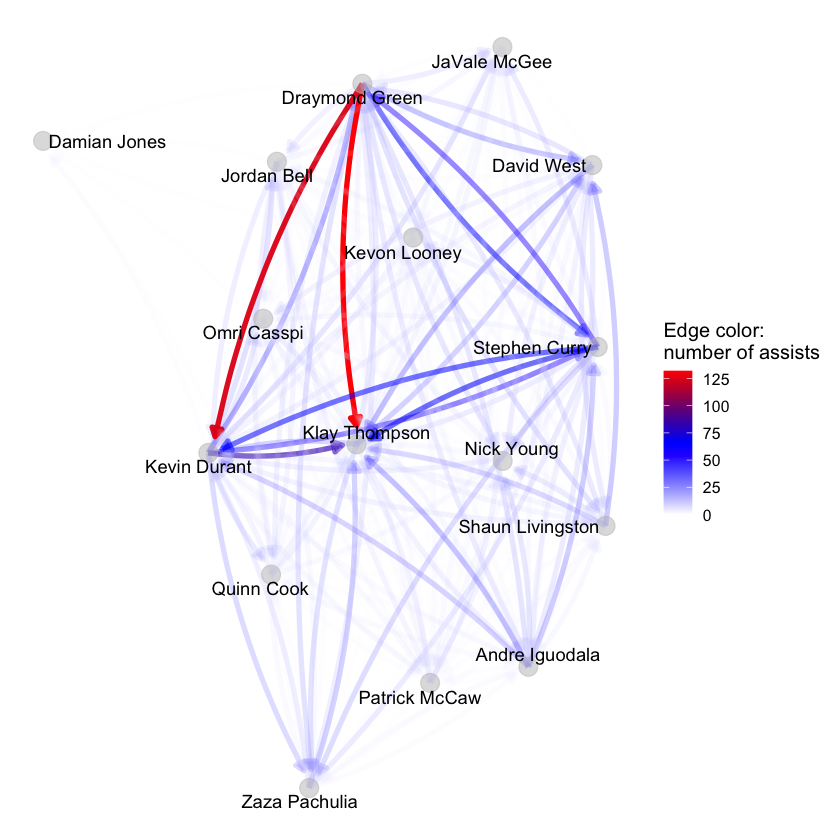

In [19]:
plot(netdata)

In the graph above, players are represented as the network nodes and the oriented edges denote the assists made by the player on the startpoint to the team-mate on the endpoint. The edge color informs the number of assists.

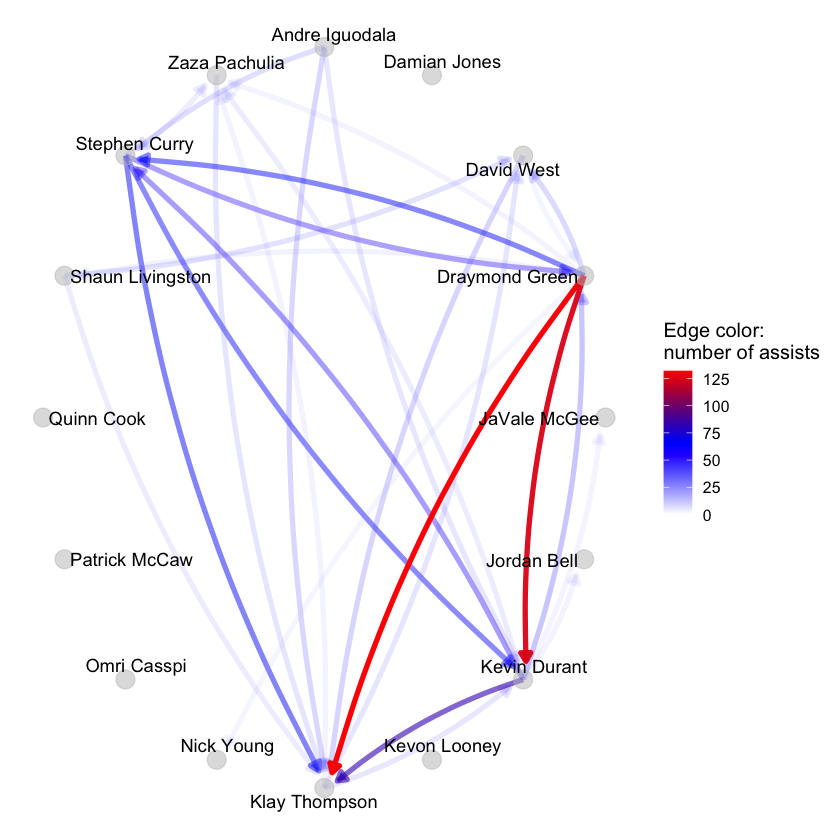

In [21]:
set.seed(7)
plot(netdata, layout="circle", edge.thr=20) # 20 assists and over